In [125]:
import numpy as np
import math
from sklearn import svm, model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [46]:
train_data = np.loadtxt('features_final.train')
test_data = np.loadtxt('features_final.test')

In [47]:
x_train = train_data[:,1:]
y_train = train_data[:,0]

x_test = test_data[:,1:]
y_test = test_data[:,0]

In [48]:
def transform(xvals, toTransform=False):
    new_x = []
    if not toTransform:
        for row in xvals:
            x1 = row[0]
            x2 = row[1]
            new_x.append(np.asarray([1, x1, x2]))
    else:
        for row in xvals:
            x1 = row[0]
            x2 = row[1]
            new_x.append(np.asarray([1, x1, x2, x1*x2, x1**2, x2**2]))
    return np.asarray(new_x)

In [49]:
def binarize(posDigit, yvals):
    return np.array([1 if classval == posDigit else -1 for classval in yvals])

In [81]:
for classval in range(10):
    x_train_bias = transform(x_train)
    x_train_transform = transform(x_train, True)
    x_test_bias = transform(x_test)
    x_test_transform = transform(x_test, True)
    binary_y_train = binarize(classval, y_train)
    binary_y_test = binarize(classval, y_test)
    model = RidgeClassifier(alpha = 1)
    
    print('-'*25, end = '\n')
    print('Classifier: ' + str(classval) + ' versus all')
    if classval in range(5):
        model.fit(x_train_transform, binary_y_train)
        print('Eout_trans: ' + str(1 - model.score(x_test_transform, binary_y_test)))
    else:
        model.fit(x_train_bias, binary_y_train)
        print('Ein_bias: ' + str(1 - model.score(x_train_bias, binary_y_train)))
    print()




-------------------------
Classifier: 0 versus all
Eout_trans: 0.10662680617837572

-------------------------
Classifier: 1 versus all
Eout_trans: 0.0219232685600399

-------------------------
Classifier: 2 versus all
Eout_trans: 0.09865470852017932

-------------------------
Classifier: 3 versus all
Eout_trans: 0.08271051320378675

-------------------------
Classifier: 4 versus all
Eout_trans: 0.09965122072745392

-------------------------
Classifier: 5 versus all
Ein_bias: 0.07625840076807022

-------------------------
Classifier: 6 versus all
Ein_bias: 0.09107118365107669

-------------------------
Classifier: 7 versus all
Ein_bias: 0.08846523110684401

-------------------------
Classifier: 8 versus all
Ein_bias: 0.074338225209162

-------------------------
Classifier: 9 versus all
Ein_bias: 0.08832807570977919



In [88]:
always_overfit = True
always_improves = True
no_diff = True
always_worsens = True
fiveall = 0
for classval in range(9):
    x_train_bias = transform(x_train)
    x_train_transform = transform(x_train, True)
    x_test_bias = transform(x_test)
    x_test_transform = transform(x_test, True)
    binary_y_train = binarize(classval, y_train)
    binary_y_test = binarize(classval, y_test)
    
    model = RidgeClassifier(alpha = 1)
    model.fit(x_train_bias, binary_y_train)
    e_in_bias = 1 - model.score(x_train_bias, binary_y_train)
    e_out_bias = 1 - model.score(x_test_bias, binary_y_test)
    model.fit(x_train_transform, binary_y_train)
    e_in_trans = 1 - model.score(x_train_transform, binary_y_train)
    e_out_trans = 1 - model.score(x_test_transform, binary_y_test)
    
    if e_in_trans > e_out_trans:
        always_overfit = False
    if not(e_out_trans <= 0.95*e_out_bias):
        always_improves = False
    if e_out_bias != e_out_trans:
        no_diff = False
    if not(e_out_trans >= 1.05*e_out_bias):
        always_worsens = False
    if classval == 5:
        fiveall = 100*(e_out_trans/e_out_bias)
print('Always Overfits: ', always_overfit)
print('Always Improves by 5%+: ', always_improves)
print('Never affects change on out sample error: ', no_diff)
print('Always worsens by 5%+: ', always_worsens)
print('For 5 versus all, e_out_transform is ' + str(fiveall) + '% of e_out_bias')

Always Overfits:  False
Always Improves by 5%+:  False
Never affects change on out sample error:  False
Always worsens by 5%+:  False
For 5 versus all, e_out_transform is 99.3750000000001% of e_out_bias


In [74]:
x_train_new = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i] in [1,5]])
y_train_p = [y_train[i] for i in range(len(y_train)) if y_train[i] in[1,5]]
y_train_new = np.asarray([y_train_p[i] if y_train_p[i] == 1 else -1 for i in range(len(y_train_p))])

x_test_new = np.asarray([x_test[i] for i in range(len(x_test)) if y_test[i] in [1,5]])
y_test_p = [y_test[i] for i in range(len(y_test)) if y_test[i] in[1,5]]
y_test_new = np.asarray([y_test_p[i] if y_test_p[i] == 1 else -1 for i in range(len(y_test_p))])

x_train_one = transform(x_train_new)
x_train_two = transform(x_train_new, True)
x_test_one = transform(x_test_new)
x_test_two = transform(x_test_new, True)

In [78]:
lambdav = [1, 0.01]
for l in lambdav:
    print('-'*25)
    print('At lambda = ' + str(l))
    model = RidgeClassifier(alpha = l)
    model.fit(x_train_two, y_train_new)
    print('Ein: ' + str(1 - model.score(x_train_two, y_train_new)))
    print('Eout: ' + str(1 - model.score(x_test_two, y_test_new)))

-------------------------
At lambda = 1
Ein: 0.005124919923126248
Eout: 0.02594339622641506
-------------------------
At lambda = 0.01
Ein: 0.004484304932735439
Eout: 0.028301886792452824


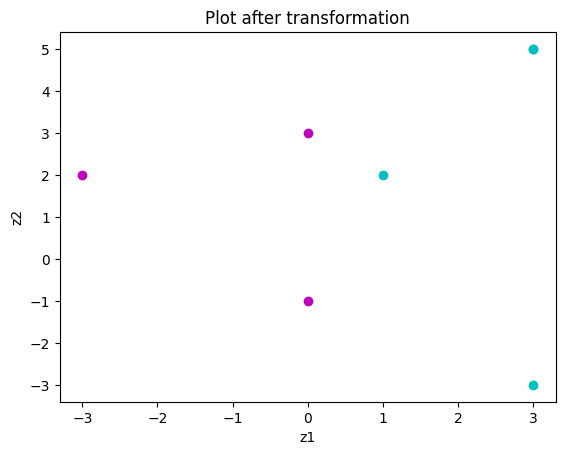

In [99]:
data = [[(1, 0), -1], [(0, 1), -1], [(0, -1), -1],
     [(-1, 0), 1], [(0, 2), 1], [(0, -2), 1],
     [(-2, 0), 1]]

minus_one = []
plus_one = []

for point in data:
    x1, x2 = point[0]
    z1, z2 = [x2**2 - 2*x1 - 1, x1**2 - 2*x2 + 1]
    if point[1] == -1:
        minus_one.append([z1, z2])
    else:
        plus_one.append([z1, z2])

minus_one = np.asarray(minus_one)
plus_one = np.asarray(plus_one)

plt.plot(plus_one[:, 0], plus_one[:, 1], 'co')
plt.plot(minus_one[:, 0], minus_one[:, 1], 'mo')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title("Plot after transformation")
plt.show()

In [107]:
xvals = []
yvals = []
for point in data:
    xvals.append(point[0])
    yvals.append(point[1])
for exp in range(-5,10):
    model = svm.SVC(kernel = 'poly', degree = 2, C=10**exp)
    model.fit(xvals, yvals)
    print('Num support vectors at C = 10e' + str(exp) +': ' + str(sum(model.n_support_)))

Num support vectors at C = 10e-5: 6
Num support vectors at C = 10e-4: 6
Num support vectors at C = 10e-3: 7
Num support vectors at C = 10e-2: 7
Num support vectors at C = 10e-1: 7
Num support vectors at C = 10e0: 7
Num support vectors at C = 10e1: 5
Num support vectors at C = 10e2: 5
Num support vectors at C = 10e3: 5
Num support vectors at C = 10e4: 5
Num support vectors at C = 10e5: 5
Num support vectors at C = 10e6: 5
Num support vectors at C = 10e7: 5
Num support vectors at C = 10e8: 5
Num support vectors at C = 10e9: 5


In [115]:
def f(x):
    x_1, x_2 = x
    val = x_2 - x_1 + 0.25*math.sin(math.pi * x_1)
    if val == abs(val):
        return +1
    else:
        return -1

In [152]:
def generate_data(N):
    dataset_x = []
    dataset_y = []
    for i in range(N):
        x_1 = random.uniform(-1, 1)
        x_2 = random.uniform(-1, 1)
        y = f([x_1, x_2])
        dataset_x.append([x_1, x_2])
        dataset_y.append(y)
    return [dataset_x, dataset_y]
    

In [117]:
num_experiments = 1000
num_inseparable = 0
for i in range(num_experiments):
    x, y = generate_data(100)
    model = svm.SVC(kernel = 'rbf', C = 100000, gamma = 1.5)
    model.fit(x, y)
    if (1 - model.score(x, y)) != 0:
        num_inseparable += 1
print('Dataset was inseparable ' + str(100*num_inseparable/num_experiments) + '% of the times')

Dataset was inseparable 0.0% of the times


In [144]:
def RBF_REG(x,mu, gamma=1.5):
    return np.exp(-gamma*np.sum((x-mu)**2))

def RBF_N(xs, ct, gamma):
    z = np.zeros((xs.shape[0], 1+ct.shape[0]))
    z[:,0] = np.ones(xs.shape[0])
    for i in range(ct.shape[0]):
        z[:,i+1] = np.apply_along_axis(RBF_REG, 1, xs, ct[i], gamma)
    return z

def get_weight(P, PT, l, y):
    inter = np.matmul(np.linalg.inv(np.matmul(PT, P) 
                     + l*np.identity(len(np.matmul(PT, P)))), PT)
    w_final = np.matmul(inter, y)
    return w_final

def regRBF_N(xs, yn, n_clusters, gamma):
    km = KMeans(n_clusters=n_clusters).fit(xs)
    ct = km.cluster_centers_
    z = RBF_N(xs, ct, gamma=gamma)
    w = get_weight(z, z.T, 0, yn)
    y_pred = np.dot(z, w)
    Ein = np.sum(y_pred*yn < 0)/(1.0*yn.size)
    return Ein, w, ct

In [179]:
def experiment(num_clusters, gamma=1.5):
    d1 = generate_data(200)
    d2 = generate_data(200)
    xn, yn = np.asarray(d1[0]), np.asarray(d1[1])
    xn_test, yn_test = np.asarray(d2[0]), np.asarray(d2[1])
    Ein_reg, w, centers = regRBF_N(xn, yn, num_clusters, gamma=gamma)
    z_out = RBF_N(xn_test, centers, gamma=gamma)
    y_pred = np.dot(z_out, w)
    Eout_reg = np.sum(y_pred*yn_test < 0)/(200.0)
    model = svm.SVC(kernel = 'rbf', C = 1000000)
    model.fit(xn, yn)
    y_pred_kern = model.predict(xn_test)
    Ein_kern = np.sum(y_pred_kern*yn<0)/(200.0)
    Eout_kern = np.sum(y_pred_kern*yn_test<0)/(200.0)
    return Ein_reg, Eout_reg, Ein_kern, Eout_kern

In [180]:
count = 0
for i in range(100):
    a, Eout_reg, b, Eout_kern = experiment(num_clusters=9)
    if Eout_reg  > Eout_kern:
        count += 1

print('Kernel beats regular RBF ' + str(count) + '% of the times')

Kernel beats regular RBF 93% of the times


In [181]:
count = 0
for i in range(100):
    a, Eout_reg, b, Eout_kern = experiment(num_clusters=12)
    if Eout_reg  > Eout_kern:
        count += 1

print('Kernel beats regular RBF ' + str(count) + '% of the times')

Kernel beats regular RBF 82% of the times


In [183]:
e_intruth = []
e_outruth = []
for i in range(100):
    ein9, eout9, _,_ = experiment(9)
    ein12, eout12, _,_ = experiment(12)
    e_intruth.append(ein9 < ein12)
    e_outruth.append(eout9 < eout12)
print('Ein goes up with num_clusters ' + str(e_intruth.count(True)) +'% times')
print('Ein goes down with num_clusters ' + str(e_intruth.count(False)) +'% times')
print('Eout goes up with num_clusters ' + str(e_outruth.count(True)) +'% times')
print('Eout goes down with num_clusters ' + str(e_outruth.count(False)) +'% times')

Ein goes up with num_clusters 17% times
Ein goes down with num_clusters 83% times
Eout goes up with num_clusters 24% times
Eout goes down with num_clusters 76% times


In [184]:
e_intruth = []
e_outruth = []
for i in range(100):
    ein9, eout9, _,_ = experiment(9, 1.5)
    ein12, eout12, _,_ = experiment(9, 2)
    e_intruth.append(ein9 < ein12)
    e_outruth.append(eout9 < eout12)
print('Ein goes up with gamma ' + str(e_intruth.count(True)) +'% times')
print('Ein goes down with gamma ' + str(e_intruth.count(False)) +'% times')
print('Eout goes up with gamma ' + str(e_outruth.count(True)) +'% times')
print('Eout goes down with gamma ' + str(e_outruth.count(False)) +'% times')

Ein goes up with gamma 52% times
Ein goes down with gamma 48% times
Eout goes up with gamma 58% times
Eout goes down with gamma 42% times


In [188]:
ct = 0
for i in range(100):
    ein9, eout9, _,_ = experiment(9, 1.5)
    if ein9 ==0:
        ct += 1
print('Ein is 0 a total ' + str(ct) +'% times')

Ein is 0 a total 0% times
